1. Загружаю необходимые для работы библиотеки Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import re
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 13,6

2. Загружаю файл с данными HR.csv в pandas dataframe

In [3]:
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Таблица представляет собой статистические данные, собранные специалистами отдела кадров с помощью опросных листов, крупной организации, содержащие информацию о текущих и уволившихся сотрудниках:
1. satisfaction_level - уровень удовлетворенности сотрудников своей работой в целом
2. last_evaluation - отношение времени с последнего повышения сотрудника к общему стажу работы в организации
3. number_project - количество реализованных сотрудником проектов
4. average_montly_hours - количество рабочих часов сотрудника в месяц
5. time_spend_company - стаж работы сотрудника в организации
6. Work_accident - количество несчастных случаев с сотрудником за все время работы
7. left - 1 - сотрудник больше не работает в организации, 0 - сотрудник все еще работает в организации
8. promotion_last_5years - был ли сотрудник повышен за последние 5 лет
9. department - отдел, в котором работает (работал) сотрудник
10. salary - уровень зарплаты сотрудника

In [4]:
data_new = data[data.columns[0:8]] 
data_new
#Выделяю отдельную таблицу только с численными значениями для подсчета численных характеристик

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


3. Рассчитываю основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [5]:
#Создаю отдельные словари под каждую переменную для записи в них данных
data_min = {}
data_max = {}
data_mean = {}
data_median = {}
data_mode = {}
data_std ={}
for key, value in data_new.items(): #Высчитываю значения 
    data_mean[key] = round(value.mean(), 2)
    data_median[key] = value.median()
    data_mode[key] = value.mode()[0]
    data_min[key] = value.min()
    data_max[key] = value.max()
    data_std[key] = round(value.std(), 2)    
frame = {'Mean': data_mean, 'Median': data_median, 'Mode': data_mode, 'Min': data_min, 'Max': data_max, 'STD': data_std} #Создаю отдельную таблицу для наглядности
pd.DataFrame(frame)

,Mean,Median,Mode,Min,Max,STD
satisfaction_level,0.61,0.64,0.10,0.09,1.0,0.25
last_evaluation,0.72,0.72,0.55,0.36,1.0,0.17
number_project,3.80,4.00,4.00,2.00,7.0,1.23
average_montly_hours,201.05,200.00,135.00,96.00,310.0,49.94
time_spend_company,3.50,3.00,3.00,2.00,10.0,1.46
Work_accident,0.14,0.00,0.00,0.00,1.0,0.35
left,0.24,0.00,0.00,0.00,1.0,0.43
promotion_last_5years,0.02,0.00,0.00,0.00,1.0,0.14


Сотрудники отдела кадров столкнулись с серьезной текучестью кадров (24%), поэтому перед сотрудниками поставлена задача выявить зависимости между указанными показателями и построить модель, позволяющую спрогнозировать, уволиться ли сотрудник при заданных параметрах.

4. Рассчитываю и визуализирую корреляционную матрицу для количественных переменных. Определяю две самые скоррелированные и две наименее скоррелированные переменные.

Использую корреляционную матрицу, потому что она позволяет наиболее легко и наглядно увидеть степень зависимости различных пар переменных.

<AxesSubplot:>

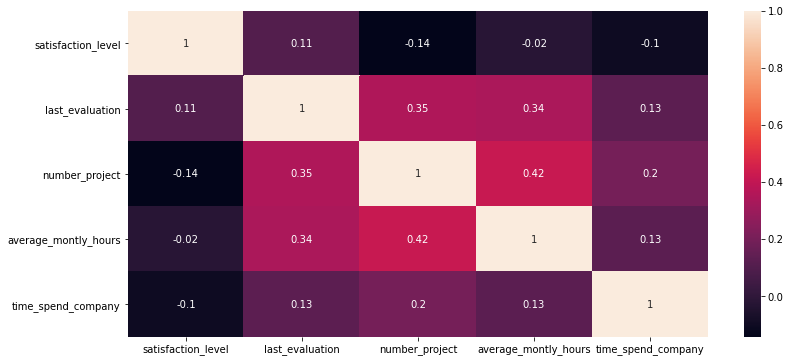

In [6]:
data_corr = data[data.columns[0:5]]
sns.heatmap(data_corr.corr(), annot = True)

Наиболее скоррелированные - среднее количество часов и количество проектов

Наименее скоррелированные - уровень удовлетворенности работой и количество проектов

5. Разделяю данные на тестовую и обучающую выборки и строю модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Использую именно модель LDA, т.к. в данном случае она позволит показать максимально наглядные результаты.

In [100]:
data_class = data_new['left']  #Создаю отдельную переменную с колонкой 'left'

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data_new, data_class, test_size=0.25) #Создаю тестовые и обучающие выборки

In [76]:
from sklearn.metrics import accuracy_score #импортирую конструктор моделей

In [104]:
lda = LinearDiscriminantAnalysis() #Записываю модель в переменную

In [78]:
lda.fit(X_train, y_train) # обучаю модель

LinearDiscriminantAnalysis()

In [91]:
example = {'satisfaction_level': [0.7],
 'last_evaluation': [0.13],
 'number_project': [7],
 'average_montly_hours': [150],
 'time_spend_company': [3],
 'Work_accident': [0],
'left': [0],
 'promotion_last_5years': [0]} #Завожу случайные данные о сотруднике, чтобы проверить, уволится ли он или нет

In [101]:
example_df = pd.DataFrame(example) #преобразую словарь example в pandas-формат DataFrame

In [103]:
lda.predict(example_df) #Само предсказание

array([0], dtype=int64)

Получили 0, следовательно, сотрудник не уволится

In [94]:
example_1 = {'satisfaction_level': [0.1],
 'last_evaluation': [0.13],
 'number_project': [7],
 'average_montly_hours': [150],
 'time_spend_company': [6],
 'Work_accident': [0],
'left': [1],
 'promotion_last_5years': [0]} #Еще раз проверю уже с другими данными

In [95]:
example_df_1 = pd.DataFrame(example_1)

In [96]:
lda.predict(example_df_1)

array([1], dtype=int64)

Получили 1, следовательно, сотрудник уволится

6. Проверка модели

Для проверки модели составляю несколько вариантов распределений и уточняю, являются ли они объяснимыми с точки зрения поведения сотрудников.

6.1 Связь количества проектов и уровня удовлетворенности

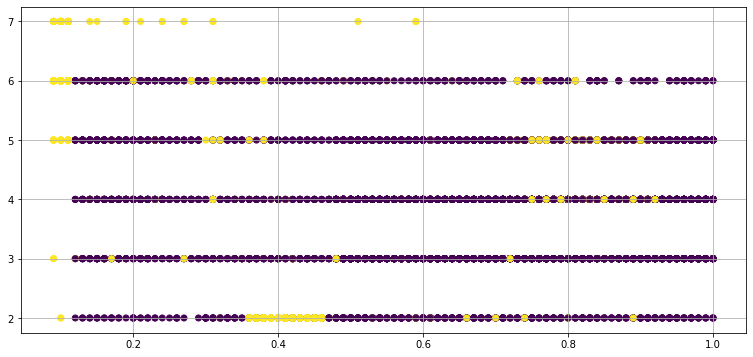

In [97]:
plt.scatter(X_train['satisfaction_level'], X_train['number_project'], c=y_train)
plt.grid(True)
plt.show()

Выделяются две группы уволившихся:
1. Люди, у которых больше 6 проектов уволились. Вне зависимости от уровня удовлетворенности. Скорее всего, связано с высокой нагрузкой
2. Люди, у которых только 2 реализованных проекта и средней (0,3-0,45) удовлетворенностью. 

Нет очевидной зависимости количества проектов от удовлетворенности, но зато видна зависимость количества уволившихся от количества реализованных проектов.

6.2 Связь количества рабочих часов и уровня удовлетворенности

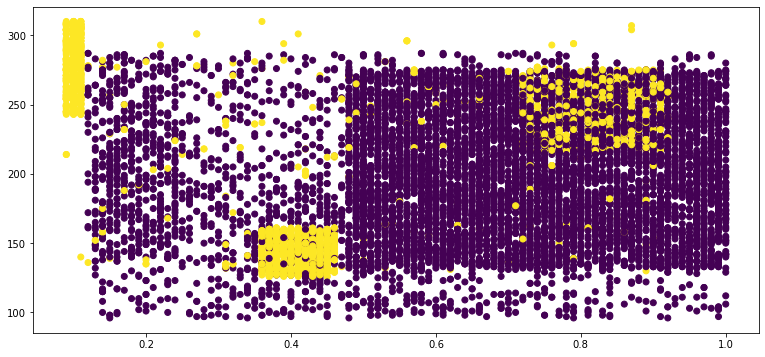

In [98]:
plt.scatter(X_train['satisfaction_level'], X_train['average_montly_hours'], c=y_train)
plt.show()

Выделяются три группы уволившихся:
1. Много рабочих часов и низкий уровень удовлетворенности. Связано с высокой загрузкой.
2. Мало рабочих часов и средний уровень удовлетворенности. Возможно, не могли себя реализовать или отсутствует интерес к проделанной работе.
3. Много рабочих часов и высокий уровень удовлетворенности. Нужен более глубоки анализ конкретных сотрудников. Возможно, сильные специалисты ушли в другую организацию на лучшие условия работы.

Видны четкие границы как минимум для двух групп сотрудников, третья нуждается в более комплексном анализе.

6.3 Связь количества сотрудников, получивших повышение за последние 5 лет и уровня удовлетворенности

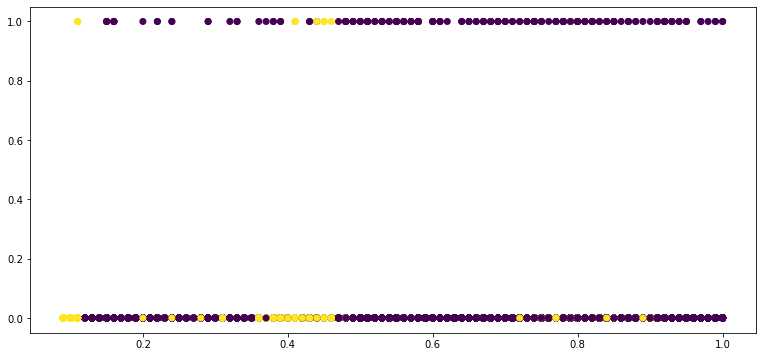

In [99]:
plt.scatter(X_train['satisfaction_level'], X_train['promotion_last_5years'], c=y_train)
plt.show()

Видно, что количество уволившихся сотрудников, получавших повышение, заметно ниже тех, кто повышения не получал

В результате проведенных исследований видно, что все распределения логичны и могут быть объяснены. Из этого могу сделать вывод, что модель работает корректно.

Ключевым результатом исследования является выявление двух групп сотрудников, у которых сочетание определенных характеристик привело к увольнению. Именно с этими группами сотрудникам отдела кадров нужно проводить мероприятия для улучшения условий труда, которые приведут к улучшению удовлетворенности работой, т.к. именно этот параметр, как видно из распределений, является ключевым при прогнозе увольнений.